<a href="https://colab.research.google.com/github/ale-camer/Data-Science/blob/Finance/youtubePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a mini-data science project in which we get data from the YouTube API in order to build a simple model that predicts likes, comments and views of videos. 

For this project I used the Lex Fridman channel because it's has a good number of videos to work with. It's also important to consider that the image of the videos weren't taken into account because it would be necessary to predict objects in the images and that is out of the scope of the project.

In [ ]:
# packages

import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [10]:
channel_id = 'UCSHZKyawb77ixDdsGog4iWA'

def YoutubeData(channel_id, youtube_key): # YouTube key was erased for security reasons
        
    """
    This function get data from the YouTube API just by introducing an API Key and the channel id. There is a limit of 500 videos for each channel and a certain amount of possible requests for each API Key.
    
    The data obtain by this function are: 
    
    - video title,
    - video date of publication,
    - video amount of views,
    - video amount of likes,
    - video amount of favorites,
    - video amount of comments,
    - if the video has subtitles,
    - video definition (HD, SD, etc),
    - video dimensions (2D, etc),
    - video duration,
    - if the video was made for kids,
    - and video projection (Rectangular, 360, etc)

    The output is a Pandas dataframe. 
    
    """

    import requests
    import pandas as pd
    from tqdm import tqdm
    import warnings
    warnings.filterwarnings('ignore')

    df = pd.DataFrame(columns=['videoTitle','videoDate','videoViewCount','videoLikeCount','videoFavoriteCount','videoCommentCount'])
    
    def getVideoId(videoId):
        
            videoDetailUrl = "https://www.googleapis.com/youtube/v3/videos?id="+videoId+"&part=statistics,contentDetails,status&key="+youtube_key
            videoDetail = requests.get(videoDetailUrl).json()
            
            videoViewCount = videoDetail['items'][0]['statistics']['viewCount']
            videoLikeCount = videoDetail['items'][0]['statistics']['likeCount']
            videoFavoriteCount = videoDetail['items'][0]['statistics']['favoriteCount']
            videoCommentCount = videoDetail['items'][0]['statistics']['commentCount']
            videoCaption = videoDetail['items'][0]['contentDetails']['caption']
            videoDefinition = videoDetail['items'][0]['contentDetails']['definition']
            videoDimension = videoDetail['items'][0]['contentDetails']['dimension']
            videoDuration = videoDetail['items'][0]['contentDetails']['duration']
            videoProjection = videoDetail['items'][0]['contentDetails']['projection']
            videoKids = videoDetail['items'][0]['status']['madeForKids']
            
            return videoViewCount, videoLikeCount, videoFavoriteCount, videoCommentCount, videoCaption, videoDefinition, videoDimension, videoDuration, videoProjection, videoKids
    
    pageToken = ""
    
    while 1:
        
        videoUrl = "https://www.googleapis.com/youtube/v3/search?key="+youtube_key+"&channelId="+channel_id+"&part=snippet,id&order=date&maxResults=10000&"+pageToken
        videoData = requests.get(videoUrl).json()
        
        for vid in tqdm(videoData['items']):
            if vid['id']['kind'] == "youtube#video":
        
                videoId = vid['id']['videoId']
                videoDate = vid['snippet']['publishedAt'][:10]
                videoTitle = vid['snippet']['title']
                videoViewCount, videoLikeCount, videoFavoriteCount, videoCommentCount, videoCaption, videoDefinition, videoDimension, videoDuration, videoProjection, videoKids = getVideoId(videoId)
                
                df = df.append({'videoTitle':videoTitle,'videoDate':videoDate,'videoViewCount':videoViewCount,
                                'videoLikeCount':videoLikeCount,'videoFavoriteCount':videoFavoriteCount,'videoCommentCount':videoCommentCount,
                                'videoCaption':videoCaption,'videoDefinition':videoDefinition,'videoDimension':videoDimension,
                                'videoDuration':videoDuration,'videoProjection':videoProjection,'videoKids':videoKids},ignore_index=True)
                
        try:
            if videoData['nextPageToken'] != None: # if none, it means it reached the last page and break out of it
                pageToken = "pageToken=" + videoData['nextPageToken']
        except:
            break
                
    df['videoDate'],df['videoViewCount'],df['videoLikeCount'],df['videoFavoriteCount'],df['videoCommentCount'] = pd.to_datetime(df['videoDate']),pd.to_numeric(df['videoViewCount']),pd.to_numeric(df['videoLikeCount']),pd.to_numeric(df['videoFavoriteCount']),pd.to_numeric(df['videoCommentCount'])
    
    return df

data = YoutubeData(channel_id=channel_id, youtube_key=youtube_key)
data    

100%|██████████| 2/2 [00:00<00:00, 31.50it/s]


,videoTitle,videoDate,videoViewCount,videoLikeCount,videoFavoriteCount,videoCommentCount,videoCaption,videoDefinition,videoDimension,videoDuration,videoKids,videoProjection
0,Oliver Stone: Vladimir Putin and War in Ukrain...,2022-05-17,206042,7624,0,3402,false,hd,2d,PT1H52M39S,0.0,rectangular
1,"Glenn Loury: Race, Racism, Identity Politics, ...",2022-05-14,130018,4874,0,892,false,hd,2d,PT3H32M24S,0.0,rectangular
2,"Saifedean Ammous: Bitcoin, Anarchy, and Austri...",2022-05-11,225839,7818,0,1573,false,hd,2d,PT4H14M41S,0.0,rectangular
3,"Chris Mason: Space Travel, Colonization, and L...",2022-05-08,382114,6323,0,654,false,hd,2d,PT2H55M5S,0.0,rectangular
4,"David Buss: Sex, Dating, Relationships, and Se...",2022-05-04,344579,7409,0,958,false,hd,2d,PT3H32M43S,0.0,rectangular
...,...,...,...,...,...,...,...,...,...,...,...,...
496,MIT 6.S094: Deep Reinforcement Learning for Mo...,2017-01-22,208549,2099,0,104,true,hd,2d,PT1H27M30S,0.0,rectangular
497,"Deep Reinforcement Learning (John Schulman, Op...",2016-09-27,54266,570,0,20,false,hd,2d,PT1H27M16S,0.0,rectangular
498,"Torch Tutorial (Alex Wiltschko, Twitter)",2016-09-27,9201,130,0,5,false,hd,2d,PT57M15S,0.0,rectangular
499,Foundations of Unsupervised Deep Learning (Rus...,2016-09-27,31393,416,0,9,false,hd,2d,PT1H24M44S,0.0,rectangular


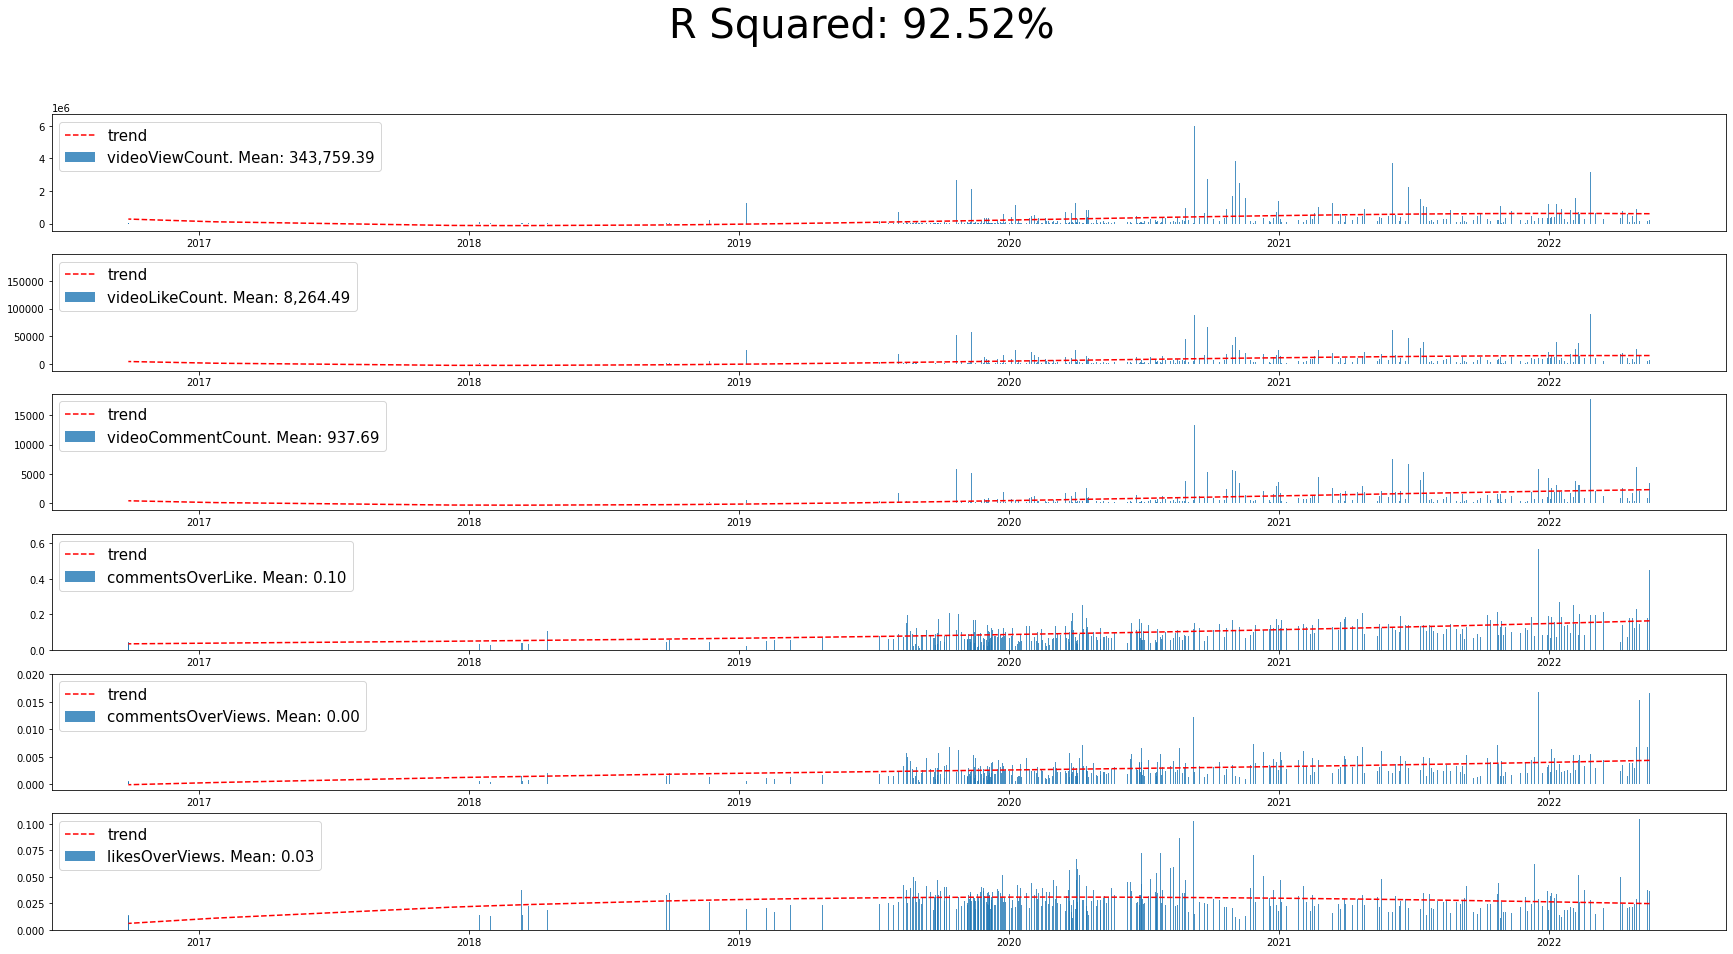

In [11]:
def explDataAnal(data):
    
    """
    This function print in graphs the time series of key variables obtained with the YoutubeData function. 
    In each graph is also plot a line trend and the mean value in the legend.
    As the suptitle of all graphs the R squared of all the variables predicting the amount of views is printed. 

    The variables are:

    - amount of views,
    - amount of likes,
    - amount of comments,
    - comments over likes,
    - comments over views,
    - and likes over views.    
    """

    import pandas as pd
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.dates as dates
    
    numeric_data = data.copy()
    numeric_data = numeric_data[['videoViewCount', 'videoLikeCount', 'videoCommentCount', 'videoDate']].set_index('videoDate')
    numeric_data['commentsOverLike'] = numeric_data['videoCommentCount'] / numeric_data['videoLikeCount']
    numeric_data['commentsOverViews'] = numeric_data['videoCommentCount'] / numeric_data['videoViewCount']
    numeric_data['likesOverViews'] = numeric_data['videoLikeCount'] / numeric_data['videoViewCount']
    numeric_data.index = pd.to_datetime(numeric_data.index)
    
    mult_corr = sm.OLS(numeric_data['videoViewCount'], numeric_data.drop('videoViewCount',axis=1)).fit().rsquared_adj
    
    plt.figure(figsize=(30,15))
    for col, num in zip(numeric_data.columns, range(len(numeric_data.columns))):
        plt.subplot(len(numeric_data.columns),1,num+1)
        plt.bar(numeric_data.index,numeric_data[col],label=f'{col}. Mean: {round(numeric_data[col].mean(),2):,.2f}', alpha=0.8, linewidth=2)
        z = np.polyfit(dates.date2num(numeric_data.index),numeric_data[col],3)
        p = np.poly1d(z)
        plt.plot(numeric_data.index,p(dates.date2num(numeric_data.index)),"r--", color = 'red', linewidth=1.5, label='trend')
        plt.legend(fontsize=15)
    plt.suptitle(f"R Squared: {round(mult_corr*100,2)}%",fontsize=40)
    plt.show()

explDataAnal(data)

In [22]:
def discretization(data):

    """
    This function discretize certain variables with more than one category. If it has just one category the variable will be drop out. 
    """

    from sklearn.preprocessing import LabelEncoder
    import pandas as pd
    
    encoder = LabelEncoder()
    for col in ['videoFavoriteCount','videoCaption','videoDefinition','videoDimension','videoKids','videoProjection']:
        if data[col].nunique() == 1:
            data.drop(col,axis=1,inplace=True)
        else:
            data[col] = encoder.fit_transform(data[[col]])
            
    return data

def videoTimes(data):

    """
    This function create new variables (year, month, day of week, day of month) from the publishing date of the video and convert the duration variable into the sum seconds per video.
    """
    
    import pandas as pd
    import re

    data['videoDateYear'], data['videoDateMonth'], data['videoDateDOM'], data['videoDateDOW'] = data['videoDate'].dt.year, data['videoDate'].dt.month, data['videoDate'].dt.day, data['videoDate'].dt.dayofweek
    data.drop('videoDate',axis=1,inplace=True)
    data['videoDuration'] = data['videoDuration'].apply(lambda a: re.findall('[0-9]+',a))
    data['videoDuration'] = data['videoDuration'].apply(lambda a: ''.join(a)).astype('str')
    data['videoDuration'] = data['videoDuration'].apply(lambda a: (6 - len(a)) * '0'  + a)
    data['videoDuration'] = data['videoDuration'].apply(lambda a: float(a[-2:]) + float(a[2:4]) * 60 + float(a[:2]) * 60 * 60)

    return data


def titleCleaning(data, language = 'english'):

    """
    This function clean the video title in order to use be able to use it for prediction purposes.
    It deletes: capital letters, stopwords, web addresses, videos description and special characters.
    """

    import pandas as pd    
    import nltk
    from nltk.corpus import stopwords
    import re

    data['videoTitle'] = data['videoTitle'].apply(lambda a: a.lower()) # change capital letter
    
    nltk.download('stopwords', quiet=True) # delete stopwords
    stopwords = stopwords.words(language)
    for row in data.index:
        data.loc[row,'videoTitle'] = ' '.join([token for token in data.loc[row,'videoTitle'].split(' ') if token not in stopwords])
    
    urls_regex = re.compile('http\S+') # delete web addresses
    for row in data.index:
        data.loc[row,'videoTitle'] = ' '.join([token for token in data.loc[row,'videoTitle'].split(' ') if not re.match(urls_regex, token)])
    
    for row in data.index: # delete everything at the right of the "|" symbol, which the author of the channel used to describe the episode number
        data.loc[row,'videoTitle'] = data.loc[row,'videoTitle'].split("|",1)[0]
    
    charsToKepp = r'[^a-zA-Z0-9\s]'
    for row in data.index: # delete especial characters 
        data.loc[row,'videoTitle'] = re.sub(charsToKepp, '', data.loc[row,'videoTitle'])
        
    return data

data1 = data.copy()

data1['videoDate'] = pd.to_datetime(data1['videoDate'])
data1 = discretization(data1)
data1 = videoTimes(data1)
data1 = titleCleaning(data1)

data1['titleLenght'] = data1['videoTitle'].apply(lambda a: len(a.split()))
maxLenght = data1['titleLenght'].max()
for col in range(maxLenght): # creating empty columns
    data1[f"col{col+1}"] = np.nan

for col in range(maxLenght): # separate each word of the title
    for row in data1.index:
        try:
            data1.loc[row,f"col{col+1}"] = data1.loc[row,"videoTitle"].split()[col]
        except:
            continue
            
for col in range(maxLenght): # one-hot encode all dataframe
    data1 = pd.concat([data1,pd.get_dummies(data1[f"col{col+1}"])],axis=1)

# delete unnecesary columns
data1.drop(['videoTitle','titleLenght'],axis=1,inplace=True)
for col in range(maxLenght): 
    data1.drop(f"col{col+1}",axis=1,inplace=True)
data1 = data1[data1.columns.value_counts()[data1.columns.value_counts() == 1].index]
data1

,jvm,propulsion,leak,key,pandemic,layers,korea,oumuamua,kung,pytorch,...,tedrake,systrom,stpierre,syndrome,susskind,suri,sullivan,stroustrup,strang,scales
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# dataframes

dfViews = data1.drop(['videoCommentCount','videoLikeCount'],axis=1)
dfLikes = data1.drop(['videoCommentCount','videoViewCount'],axis=1)
dfComments = data1.drop(['videoViewCount','videoLikeCount'],axis=1)

xViews, yViews, xLikes, yLikes, xComments, yComments = dfViews.drop('videoViewCount',axis=1), dfViews['videoViewCount'], dfLikes.drop('videoLikeCount',axis=1), dfLikes['videoLikeCount'], dfComments.drop('videoCommentCount',axis=1), dfComments['videoCommentCount']

xTrainViews, xTestViews, yTrainViews, yTestViews = train_test_split(xViews, yViews, test_size=0.1, random_state=1)
xTrainLikes, xTestLikes, yTrainLikes, yTestLikes = train_test_split(xLikes, yLikes, test_size=0.1, random_state=1)
xTrainComments, xTestComments, yTrainComments, yTestComments = train_test_split(xComments, yComments, test_size=0.1, random_state=1)
xTrainViews.shape, xTestViews.shape, yTrainViews.shape, yTestViews.shape, xTrainLikes.shape, xTestLikes.shape, yTrainLikes.shape, yTestLikes.shape, xTrainComments.shape, xTestComments.shape, yTrainComments.shape, yTestComments.shape

((450, 1104),
 (51, 1104),
 (450,),
 (51,),
 (450, 1104),
 (51, 1104),
 (450,),
 (51,),
 (450, 1104),
 (51, 1104),
 (450,),
 (51,))

In [24]:
# predictions

xScaler, yScaler = MinMaxScaler(), MinMaxScaler()
model = DecisionTreeRegressor()

xTrain1, xTest1, yTrain1 = xScaler.fit_transform(xTrainViews), xScaler.fit_transform(xTestViews), yScaler.fit_transform(yTrainViews.values.reshape(-1, 1))
model_fit1 = model.fit(xTrain1, yTrain1)
prediction1 = model_fit1.predict(xTest1)
prediction1 = yScaler.inverse_transform(pd.DataFrame(prediction1).values.reshape(-1, 1))
prediction1 = pd.DataFrame(prediction1).reset_index().drop('index',axis=1).rename(columns={0:'prediction'})
reales1 = pd.DataFrame(yTestViews).reset_index().drop('index',axis=1)
dfControl1 = pd.concat([reales1,prediction1],axis=1)   

xTrain2, xTest2, yTrain2 = xScaler.fit_transform(xTrainLikes), xScaler.fit_transform(xTestLikes), yScaler.fit_transform(yTrainLikes.values.reshape(-1, 1))
model_fit2 = model.fit(xTrain2, yTrain2)
prediction2 = model_fit2.predict(xTest2)
prediction2 = yScaler.inverse_transform(pd.DataFrame(prediction2).values.reshape(-1, 1))
prediction2 = pd.DataFrame(prediction2).reset_index().drop('index',axis=1).rename(columns={0:'prediction'})
reales2 = pd.DataFrame(yTestLikes).reset_index().drop('index',axis=1)
dfControl2 = pd.concat([reales2,prediction2],axis=1)   

xTrain3, xTest3, yTrain3 = xScaler.fit_transform(xTrainComments), xScaler.fit_transform(xTestComments), yScaler.fit_transform(yTrainComments.values.reshape(-1, 1))
model_fit3 = model.fit(xTrain3, yTrain3)
prediction3 = model_fit3.predict(xTest3)
prediction3 = yScaler.inverse_transform(pd.DataFrame(prediction3).values.reshape(-1, 1))
prediction3 = pd.DataFrame(prediction3).reset_index().drop('index',axis=1).rename(columns={0:'prediction'})
reales3 = pd.DataFrame(yTestComments).reset_index().drop('index',axis=1)
dfControl3 = pd.concat([reales3,prediction3],axis=1)   
dfControl1, dfControl2, dfControl3

(    videoViewCount  prediction
 0           171147    326513.0
 1            10435     20887.0
 2           343872    839699.0
 3           275624    815084.0
 4             5882      3463.0
 5            24149      5798.0
 6           128778     21691.0
 7           824619    544569.0
 8            35717     18339.0
 9           295650    815084.0
 10           31010      8964.0
 11          183618     36300.0
 12         1221646    368541.0
 13          760337    153877.0
 14           30170     18339.0
 15          433871    172465.0
 16            5638     11580.0
 17           76044    369001.0
 18          221014     85733.0
 19         1745311    815084.0
 20           58248     33364.0
 21          674199     33364.0
 22           66106     18339.0
 23          116579      8964.0
 24          224204    215941.0
 25            2752     15344.0
 26          888223    162864.0
 27           36601     18030.0
 28         2474310    736346.0
 29          388585     49287.0
 30     

In [36]:
# evaluation metrics

corr1, corr2, corr3 = round(np.corrcoef(dfControl1.videoViewCount,dfControl1.prediction)[0][1]*100,2), round(np.corrcoef(dfControl2.videoLikeCount,dfControl2.prediction)[0][1]*100,2), round(np.corrcoef(dfControl3.videoCommentCount,dfControl3.prediction)[0][1]*100,2)
rsme1, rsme2, rsme3 = round(math.sqrt(np.square(np.subtract(dfControl1.videoViewCount,dfControl1.prediction)).mean()),2), round(math.sqrt(np.square(np.subtract(dfControl2.videoLikeCount,dfControl2.prediction)).mean()),2), round(math.sqrt(np.square(np.subtract(dfControl3.videoCommentCount,dfControl3.prediction)).mean()),2)  

(28.15, 32.72, 37.76, 548414.14, 11591.03, 1517.43)

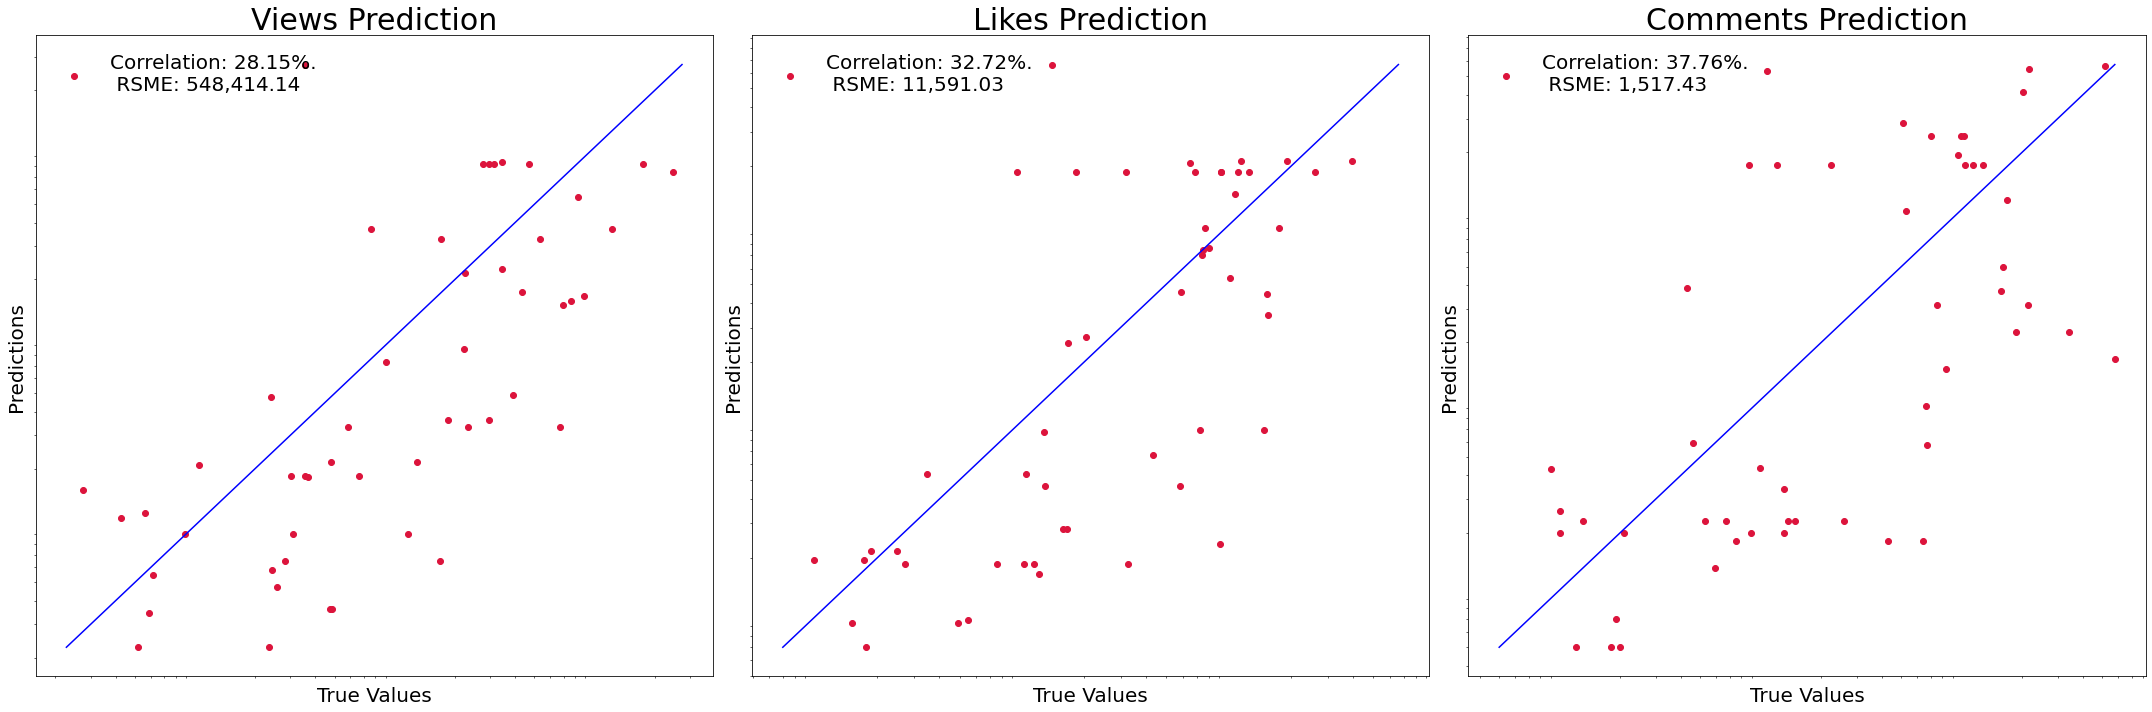

In [43]:
# plots

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
plt.scatter(dfControl1.videoViewCount,dfControl1.prediction, c='crimson', label="Correlation: {:,.2f}%. \n RSME: {:,.2f}".format(corr1,rsme1))
plt.yscale('log')
plt.xscale('log')
p1 = max(max(dfControl1.prediction), max(dfControl1.videoViewCount))
p2 = min(min(dfControl1.prediction), min(dfControl1.videoViewCount))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predictions', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper left', frameon=False, fontsize=20)
plt.title('Views Prediction',fontsize=30)

plt.subplot(1,3,2)
plt.scatter(dfControl2.videoLikeCount,dfControl2.prediction, c='crimson', label="Correlation: {:,.2f}%. \n RSME: {:,.2f}".format(corr2,rsme2))
plt.yscale('log')
plt.xscale('log')
p1 = max(max(dfControl2.prediction), max(dfControl2.videoLikeCount))
p2 = min(min(dfControl2.prediction), min(dfControl2.videoLikeCount))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predictions', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper left', frameon=False, fontsize=20)
plt.title('Likes Prediction',fontsize=30)    

plt.subplot(1,3,3)
plt.scatter(dfControl3.videoCommentCount,dfControl3.prediction, c='crimson', label="Correlation: {:,.2f}%. \n RSME: {:,.2f}".format(corr3,rsme3))
plt.yscale('log')
plt.xscale('log')
p1 = max(max(dfControl3.prediction), max(dfControl3.videoCommentCount))
p2 = min(min(dfControl3.prediction), min(dfControl3.videoCommentCount))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=20)
plt.ylabel('Predictions', fontsize=20)
plt.xticks([])
plt.yticks([])
plt.legend(loc='upper left', frameon=False, fontsize=20)
plt.title('Comments Prediction',fontsize=30)
# print(j)
        
# plt.suptitle(f'{file}',fontsize=30)
plt.tight_layout()    
plt.show()